In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def shape_mesh(bbox):
    l, b, r, t = bbox
    sm = shapely.geometry.box(l, b, r, t)
    x = np.arange(l, r, 1000)
    y = np.arange(b, t, 1000)
    squares = []
    for j in range(len(y) - 1):
        for i in range(len(x) - 1):
            square = shapely.geometry.box(x[i], y[j], x[i+1], y[j+1])
            squares.append(square)
    return squares

In [2]:
city = gpd.read_file('shapes/districts/districts.shp', encoding='utf-8')
city = city.to_crs(epsg=3035)
city.plot()

In [5]:
bbox = city.unary_union.bounds
sqrs = shape_mesh(bbox)
sqrs = pd.DataFrame(sqrs, columns=['geometry', ])
sqrs = gpd.GeoDataFrame(sqrs, geometry='geometry', crs={'init': 'epsg:3035'})
sqrs['head']

-57398.02636503428

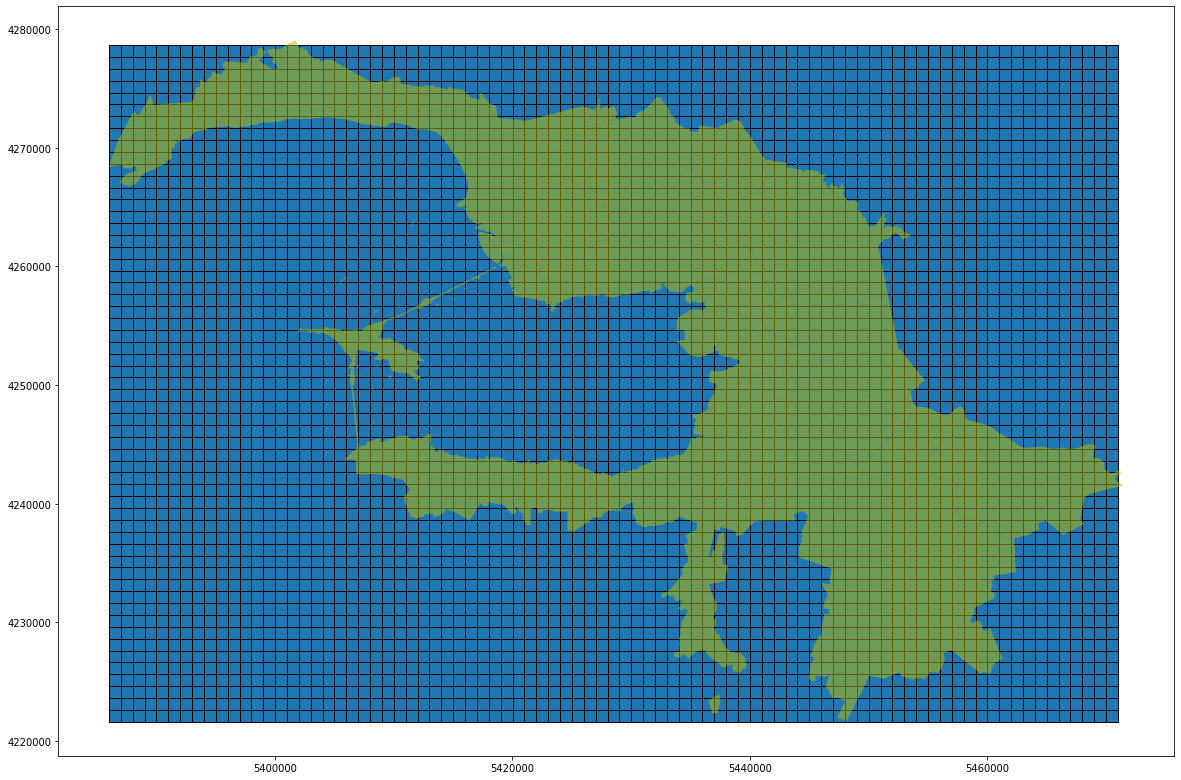

In [10]:
fid, ax = plt.subplots(figsize=(20, 30))
sqrs.plot(ax=ax, edgecolor='k')
city.plot(ax=ax, alpha=0.5, color='y')

In [11]:
sqrs.to_file('shapes/grid1000/grid1000.shp', encoding='utf-8')